Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [1]:
NAME = "Anurag Singh Negi"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [2]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

In [3]:
## TYPE YOUR CODE HERE

In [4]:
# Point 1,2 and 3
# Data was downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

# Data was loaded from the downloaded files iris.data
iris = pd.read_csv("iris.data",header=None)

# Column names were set as per the column names in data definition
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

In [5]:
# Point 4 : top 5 rows of the data 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Point 4 : We are using the describe function to get insight into the data on the count, mean, min, max and
#           other values for each of the column

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


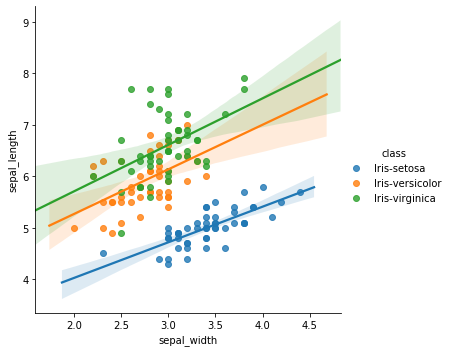

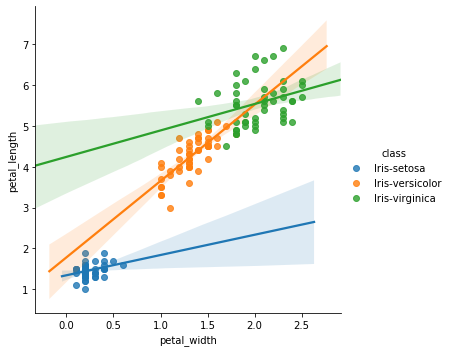

In [7]:
# Point 4 : Scatter plots for sepal_width vs sepal_length and petal_width vs petal_length with each class in
#          different color
sns.lmplot(x="sepal_width" ,y="sepal_length", hue = "class" , data=iris); 
sns.lmplot(x="petal_width" ,y="petal_length",hue = "class", data=iris);

In [8]:
# Point 5 : Preparing feature variables X and response y.
#          We have X as our feature variable consisting of columns sepal_length, sepal_width,
#          petal_length and petal_width for our response variable y we are using the column class.
#          We are converting the columns into arrays to be used by sklearn

X = iris[['sepal_length','sepal_width','petal_length','petal_width']].values
y = iris['class'].values

In [9]:
# Point 6 : We are splitting the data using train_test_split function into 70/30

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = .3, random_state = 100)

In [10]:
# Point 7 : Instantiating the model using KNeighborsClassifier.
#           Running the classifier on the model with k = 3
k_neighbr = KNeighborsClassifier(n_neighbors = 3)
k_neighbr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# Point 8 : We are predicting the value of y for the test data we X_test. As the test data is 30% 
#          of the total data we have total 45 test data point. 
#          We are predicting the value of y (y_predict) using the test data set () and then comparing it with the
#          original value of y in the test data set to find the totat correct predictions and accuracy score.
#          Please note : k=3 and test_size=.3

y_predict = k_neighbr.predict(X_test)
Total_correct_predictions = accuracy_score(y_test, y_predict, normalize=False)
accuracy_score_fraction = accuracy_score(y_test, y_predict, normalize=True)
print ('Total Correct predictions: {0}  and Accuracy score is : {1}'.format(Total_correct_predictions,accuracy_score_fraction))

Total Correct predictions: 44  and Accuracy score is : 0.9777777777777777


In [12]:
# Point 9 : 
# Creating an array for different values of k as specified in the assignment

k_values_arr= [1, 3, 5, 7, 10, 20, 30, 40, 50]

# Creating an array for 10 different random values of train test split with train data between 70 to 80 percent.

split_values_arr = np.random.uniform(low=0.2, high=0.3, size=(10,)).round(2)

# Creating the dataframe with columns as values of k, split, total correct predictions and accuracy score

score_prediction = pd.DataFrame({'k_value' : [],'split_value' : [],'total_correct_prediction' : [], 'acc_score': []})

# looping through the values of k and split to add the values of total correct prediction and accuracy score
# for the each of them where we are predicting the values of y ()

for k in k_values_arr:
    for split in split_values_arr:
        X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = split, random_state = 100)
        k_neighbrs = KNeighborsClassifier(n_neighbors = k)
        k_neighbrs.fit(X_train,y_train)
        y_predict = k_neighbrs.predict(X_test)
        score_prediction = score_prediction.append({'k_value': k, 'split_value': split, 'total_correct_prediction': accuracy_score(y_test, y_predict, normalize=False), 'acc_score' : accuracy_score(y_test, y_predict, normalize=True) }, ignore_index=True)
 
score_prediction

,k_value,split_value,total_correct_prediction,acc_score
0,1.0,0.24,35.0,0.972222
1,1.0,0.30,44.0,0.977778
2,1.0,0.23,34.0,0.971429
3,1.0,0.27,40.0,0.975610
4,1.0,0.27,40.0,0.975610
5,1.0,0.23,34.0,0.971429
6,1.0,0.23,34.0,0.971429
7,1.0,0.26,38.0,0.974359
8,1.0,0.26,38.0,0.974359
9,1.0,0.22,32.0,0.969697


In [13]:
# Average accuracy and avergae correct predictions for each value of k

avg_accuracy_and_prediction = score_prediction[['k_value','total_correct_prediction', 'acc_score']].groupby(['k_value']).mean()
avg_accuracy_and_prediction

,total_correct_prediction,acc_score
k_value,,
1.0,36.9,0.973392
3.0,36.9,0.973392
5.0,36.9,0.973392
7.0,37.9,1.000000
10.0,37.9,1.000000
20.0,35.4,0.934000
30.0,35.9,0.946784
40.0,33.9,0.893568
50.0,32.9,0.866960


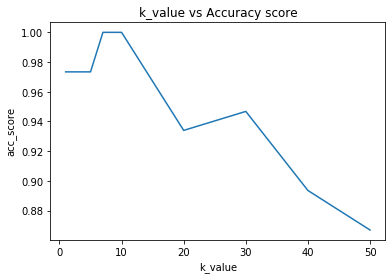

In [14]:
# Ploting the average accuracy score for different values of k
# avg_accuracy_and_prediction.index gives the different values of k set as the index for the data frame
# Conclusion : We observe a general trend that with the increase in the value of k the average accuracy score drops and
#              maximum average accuracy is observed for when k is set to 7 or 10 and minimum average 
#              accuracy is observed when k is set to 50.

sns.lineplot(x= avg_accuracy_and_prediction.index, y= avg_accuracy_and_prediction['acc_score']);
plt.title('k_value vs Accuracy score');